In [17]:
import json
from pager import PageModel, PageModelUnit, WordsAndStylesModel, SpGraph4NModel, WordsAndStylesToSpGraph4N
from pager.page_model.sub_models.dtype import Style, StyleWord, ImageSegment

In [12]:
page_model = PageModel([
    PageModelUnit("words_and_styles", sub_model=WordsAndStylesModel(), extractors=[], converters={}),
    PageModelUnit("graph", sub_model=SpGraph4NModel(), extractors=[],  converters={"words_and_styles": WordsAndStylesToSpGraph4N()}),
])

In [13]:
with open("PMC3810709_00003.jpg.json", "r") as f:
    info_img = json.load(f)

In [14]:
publaynet_rez = info_img["blocks"]
pager_rez = info_img["additional_info"]

In [15]:
print(publaynet_rez[0])
print("words:\n", pager_rez["words"][0])
print("styles:\n", pager_rez["styles"][0])

{'x_top_left': 59, 'y_top_left': 84, 'width': 473, 'height': 17, 'label': 1}
words:
 {'content': 'Modeling', 'style_id': 0, 'segment': {'x_top_left': 403, 'x_bottom_right': 440, 'y_top_left': 60, 'y_bottom_right': 69}, 'type_align': None}
styles:
 {'font2vec': [0.6527233115468409, 0.9803921568627452, 0.84568097509274, 0.07469064021398707, 0.8456809750927399, 0.6666666666666666, 0.2222222222222222], 'id': 0}


In [18]:
page_model.from_dict(pager_rez)
page_model.extract()
# page_model.to_dict()

In [25]:
blocks = [ImageSegment(dict_p_size=bl) for bl in publaynet_rez]
page_model.page_units[0].sub_model.words[1].segment.is_intersection(blocks[1])

False

In [32]:
page_model.page_units[0].sub_model.words[2].segment.get_segment_2p()

{'x_top_left': 478,
 'x_bottom_right': 509,
 'y_top_left': 49,
 'y_bottom_right': 77}

In [29]:
blocks[0].get_segment_2p()

{'x_top_left': 59,
 'x_bottom_right': 532,
 'y_top_left': 84,
 'y_bottom_right': 101}

In [33]:
import matplotlib.pyplot as plt

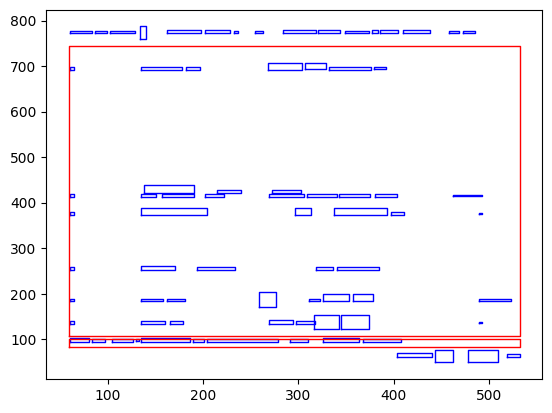

In [35]:
for seg_w in [w.segment for w in page_model.page_units[0].sub_model.words]:
    seg_w.plot()

for b in blocks:
    b.plot(color="r")

In [39]:
[w.content for w in page_model.page_units[0].sub_model.words]

['Modeling',
 'hanes',
 'conics',
 'вт',
 'Sys',
 'LS',
 'et',
 'a',
 'lua',
 'aed',
 'acral',
 'Tab',
 'боли',
 'erm,',
 'с',
 '‘ana',
 'Pe',
 'Ti',
 'ml',
 'cing',
 'psi',
 '7',
 'с',
 'Min',
 '01',
 'sg',
 'nt',
 'ec',
 'wr',
 'soe',
 'с',
 'ooo',
 '0.071',
 'a',
 'mse',
 'у',
 'Са',
 'ne',
 'nan',
 'me',
 '+',
 'у',
 'ocr,',
 'Camarine',
 'So',
 'Корана',
 'фм',
 'от',
 'apt',
 '..',
 'pear',
 'Fe',
 'faa',
 'у',
 'Vath',
 '2012',
 'Tet',
 'a',
 'epi',
 'i',
 '{©2012',
 'The',
 'Ans',
 'до',
 'АННЫ',
 'Бо',
 '©',
 'В',
 'Бодо',
 'Бобер.',
 'sma',
 'of',
 'pl',
 'Bolg',
 '8',
 '880']